In [ ]:
#Load packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [ ]:
#Data Loading and Preprocessing
train_data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
print(train_data.columns)

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')


In [ ]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111.0,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [ ]:
train_data['Product Tags']

,Product Tags
0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,"Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...
4258,3D Bath Spa Pillow Cushion Comfort Neck & Back...
4259,"Rimmel BB Cream Matte, Medium, 1 oz, Wal-mart,..."
4260,Australian Gold Sunscreen High Strength SPF 15...
4261,Physicians Formula Shimmer Strips Custom Bronz...


In [ ]:
train_data.shape

(4263, 32)

In [ ]:
train_data.isnull().sum().sort_values(ascending = False)

,0
Dataset Origin,4263
Product Barcode,4263
Match Score,4263
Match Rank,4263
Match Type,4263
Product Contents,4263
Upc,4263
Sku,4263
Product Model Number,4263
Bsr,4263


In [ ]:
# extract important columns
train_data = train_data[['Uniq Id','Product Id','Product Rating','Product Reviews Count','Product Category','Product Brand','Product Name','Product Image Url','Product Description','Product Tags']]
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags'],
      dtype='object')

In [ ]:
train_data.shape

(4263, 10)

In [ ]:
train_data.isnull().sum().sort_values(ascending = False)

,0
Product Rating,2330
Product Reviews Count,1352
Product Description,934
Product Category,10
Product Brand,7
Product Image Url,1
Product Tags,1
Uniq Id,0
Product Id,0
Product Name,0


In [ ]:
#fill missing values
train_data.fillna({'Product Rating': 0, 'Product Reviews Count': 0, 'Product Category':'','Product Brand':'','Product Description':''}, inplace=True)
 #any missing (or NaN) values in the 'Product Rating' column are replaced by 0, and it updates the DataFrame directly.
 #inplace=True: This updates the DataFrame directly without creating a copy.
 #Why This Avoids Chained Assignment:
# In this example, there’s no intermediate slicing (e.g., df['Product Rating']) that creates a copy.
# The operation is done directly on the entire DataFrame, updating multiple columns at once,
# so there is no risk of accidentally modifying a view rather than the original DataFrame.

<ipython-input-10-9c379aeb14f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna({'Product Rating': 0, 'Product Reviews Count': 0, 'Product Category':'','Product Brand':'','Product Description':''}, inplace=True)


In [ ]:
train_data.isnull().sum()

,0
Uniq Id,0
Product Id,0
Product Rating,0
Product Reviews Count,0
Product Category,0
Product Brand,0
Product Name,0
Product Image Url,1
Product Description,0
Product Tags,1


In [ ]:
#check duplicate values
train_data.duplicated().sum()

0

In [ ]:
#make column names shorter
#define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id' : 'ID',
    'Product Id' : 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name' : 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags' : 'Tags',
    'Product Contents': 'Contents'
}

# Rename the columns using the mapping
train_data.rename(columns = column_name_mapping, inplace=True)
print(train_data.columns)


Index(['ID', 'ProdID', 'Rating', 'ReviewCount', 'Category', 'Brand', 'Name',
       'ImageURL', 'Description', 'Tags'],
      dtype='object')


In [ ]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
# train_data['ID'].str.extract(r'(\d+)') : This extracts only the numeric part (digits) from the 'ID' column, which likely contains strings.
#The regular expression r'(\d+)' is used to find one or more digits (\d+) and captures them in a group.
#This method returns a DataFrame with the extracted numeric values.
#.astype(float) : After extracting the numeric values (which will initially be in string format), this converts them into floating-point numbers (float type).

In [ ]:
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [ ]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [ ]:
# EDA
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1518
Number of unique items: 1485
Number of unique ratings: 36


In [ ]:
#Pivot the DataFrame to create a heatmap
heatmap_data  = train_data.pivot_table('ID','Rating')
print(heatmap_data)

                  ID
Rating              
0.0     3.497120e+20
1.0     4.353628e+04
1.3     8.000000e+00
1.5     3.315000e+02
1.8     3.517850e+04
2.0     1.798357e+03
2.1     7.099400e+05
2.2     4.666667e+00
2.3     5.533333e+02
2.4     2.563650e+04
2.5     2.273333e+02
2.6     1.500000e+03
2.7     5.074867e+04
2.8     2.498022e+09
2.9     4.000000e+00
3.0     1.550752e+11
3.1     4.616667e+01
3.2     9.341350e+04
3.3     1.465812e+03
3.4     1.518698e+05
3.5     1.432155e+09
3.6     1.103977e+06
3.7     1.088525e+07
3.8     2.079760e+05
3.9     9.297584e+09
4.0     7.497680e+08
4.1     1.731330e+10
4.2     4.963237e+06
4.3     4.495675e+07
4.4     3.413616e+07
4.5     2.624959e+09
4.6     1.770861e+17
4.7     2.313428e+10
4.8     2.465323e+15
4.9     1.599890e+06
5.0     2.638014e+11


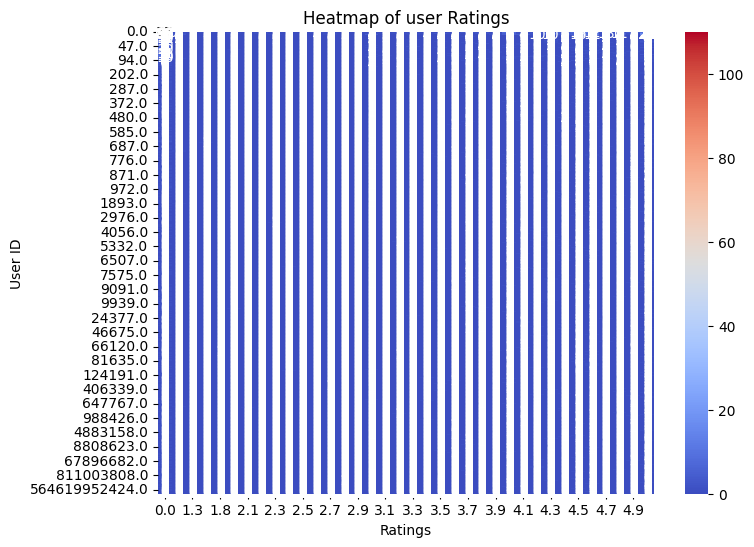

In [ ]:
#Pivot the DataFrame to create a heatmap
heatmap_data  = train_data.pivot_table(index='ID',columns='Rating',aggfunc='size',fill_value=0)

#create the heatmap
#visualize the relationship between users and their ratings of products using a heatmap
#how many times each user gave a particular rating.
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt='g',cmap='coolwarm',cbar=True)
plt.title('Heatmap of user Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

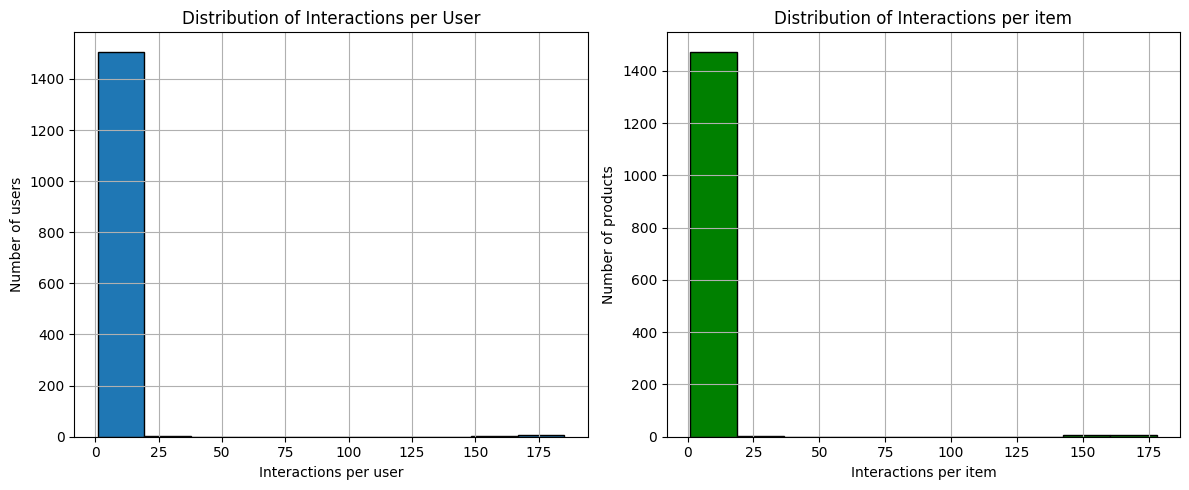

In [ ]:
#Distribution of interactions
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per user')
plt.ylabel('Number of users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k', color = 'green')
plt.xlabel('Interactions per item')
plt.ylabel('Number of products')
plt.title('Distribution of Interactions per item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

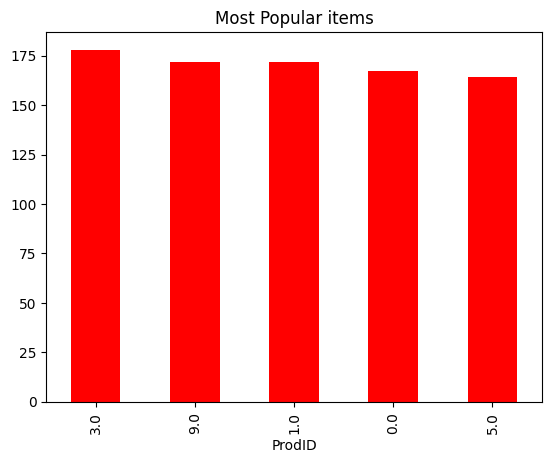

In [ ]:
#most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar', color='red')
plt.title('Most Popular items')

<Axes: xlabel='Rating'>

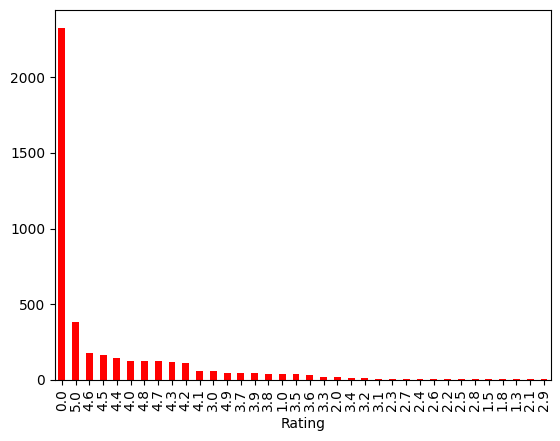

In [ ]:
#most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")  #Loads a pre-trained small English language model

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category','Brand','Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

#This code cleans text by converting it to lowercase, removing non-alphanumeric characters and stop words, and then extracts the remaining words (tags).
#It applies this process to specified columns (Category, Brand, Description) in a DataFrame, storing the cleaned tags as comma-separated strings.

In [ ]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.000000e+00,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,7.600000e+01,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.000000e+00,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...",Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.000000e+00,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.000000e+00,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4258,8.000000e+00,7.561500e+04,0.0,0.0,"personal, care, bath, body, loofahs, bath, spo...",singes,3D Bath Spa Pillow Cushion Comfort Neck & Back...,https://i5.walmartimages.com/asr/586a6bbc-da67...,"item, specifics, type, spa, bath, pillow, mate...",3D Bath Spa Pillow Cushion Comfort Neck & Back...
4259,8.000000e+01,7.820000e+03,3.1,12.0,"beauty, makeup, face, makeup, bb, cream, rimme...",rimmel,"Rimmel BB Cream Matte, Medium, 1 oz",https://i5.walmartimages.com/asr/333cf112-59c6...,"bb, cream, matte, packed, matte, perfecting, b...","Rimmel BB Cream Matte, Medium, 1 oz, Wal-mart,..."
4260,8.000000e+00,3.580252e+10,4.9,58.0,"personal, care, sun, care, sunscreen","australian, gold",Australian Gold Sunscreen High Strength SPF 15...,https://i5.walmartimages.com/asr/56decb3b-9284...,"australian, gold, sunscreen, high, strength, s...",Australian Gold Sunscreen High Strength SPF 15...
4261,2.220000e+03,2.200000e+01,0.0,2.0,"beauty, makeup, face, makeup, bronzer, bronzin...","physicians, formula",Physicians Formula Shimmer Strips Custom Bronz...,https://i5.walmartimages.com/asr/553ac928-e0d0...,"glow, ve, missing, highlight, skin, luminous, ...",Physicians Formula Shimmer Strips Custom Bronz...


In [ ]:
#concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)
#The code merges the cleaned tags from the Category, Brand, and Description columns into a new Tags column, allowing  to have all the tags in one place for each row in the DataFrame.


In [ ]:
train_data
train_data.to_csv('clean_data.csv', index=False)

#Rating base recommendation system

In [ ]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()
print(average_ratings)
#If train_data has multiple entries for a product (same Name, Brand, etc.) with different ratings, this code will calculate the mean rating and store it in the average_ratings DataFrame.

                                                   Name  ReviewCount  \
0     $6 Mail-In Rebate Available Braun Epilator Sil...        146.0   
1     ($100 Value) Peter Thomas Roth Thermal Therapy...          1.0   
2     ($11 Value) Love Beauty and Planet Coconut Wat...        278.0   
3     ($125 Value) Impressions Vanity Touch Pro LED ...          2.0   
4     ($129 Value) CHI G2 Ceramic Titanium Infused H...         23.0   
...                                                 ...          ...   
4252     wet n wild MegaLast Salon Nail Color, Heatwave       1561.0   
4253  wet n wild Photo Focus Correcting Palette, Col...         12.0   
4254   wet n wild Photo Focus Pressed Powder, Dark Café        635.0   
4255  wet n wild Silk Finish Lipstick, Honolulu Is C...       4259.0   
4256                     wnw i-shimmer eyepencil sky li          0.0   

                     Brand                                           ImageURL  \
0                    braun  https://i5.walmartimages.c

In [ ]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)
print(rating_base_recommendation)
#This code sorts products based on their average ratings in descending order and selects the top 10 highest-rated products.

                                                   Name  ReviewCount  \
57    (2 Pack) Great Value Edible Metallic Shimmer S...          2.0   
50    (2 Pack) Cetaphil In-Shower Moisturizing Oil f...          1.0   
4186         carmex lip balm stick, strawberry, 3 count          1.0   
4146  ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...          1.0   
1265  Deep Steep Foaming Hand Wash Grapefruit-Bergam...          1.0   
1261  Deago Water Sports Skin Socks Beach Swim Baref...          1.0   
1257  Ddrops Booster Liquid Vitamin D3 600 IU 0 09 f...          6.0   
1253   Dax High & Tight Awesome Shine Hair Dress 3.5 oz          1.0   
1330  Dl Permatex Blue Label 01406 Cream Hand Cleane...          2.0   
2841  OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...          1.0   

              Brand                                           ImageURL  Rating  
57     great, value  https://i5.walmartimages.com/asr/6eae6398-d29b...     5.0  
50         cetaphil  https://i5.walmartimages

In [ ]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)
#This code converts the data types of the 'Rating' and 'ReviewCount' columns in the rating_base_recommendation DataFrame to integers

<ipython-input-29-14a31ed65ba8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
<ipython-input-29-14a31ed65ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [ ]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation


Rating Base Recommendation System: (Trending Products)


<ipython-input-30-6e413a8a573d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
57,(2 Pack) Great Value Edible Metallic Shimmer S...,2,"great, value",https://i5.walmartimages.com/asr/6eae6398-d29b...,5
50,(2 Pack) Cetaphil In-Shower Moisturizing Oil f...,1,cetaphil,https://i5.walmartimages.com/asr/9266b85d-75a9...,5
4186,"carmex lip balm stick, strawberry, 3 count",1,carmex,https://i5.walmartimages.com/asr/adbcfbe8-fb3c...,5
4146,ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...,1,jomax,https://i5.walmartimages.com/asr/d04c8d61-023a...,5
1265,Deep Steep Foaming Hand Wash Grapefruit-Bergam...,1,"deep, steep",https://i5.walmartimages.com/asr/92b0f987-130a...,5
1261,Deago Water Sports Skin Socks Beach Swim Baref...,1,deago,https://i5.walmartimages.com/asr/414af1ea-afbc...,5
1257,Ddrops Booster Liquid Vitamin D3 600 IU 0 09 f...,6,ddrops,https://i5.walmartimages.com/asr/2b397feb-bc62...,5
1253,Dax High & Tight Awesome Shine Hair Dress 3.5 oz,1,dax,https://i5.walmartimages.com/asr/9d94a3fc-58d0...,5
1330,Dl Permatex Blue Label 01406 Cream Hand Cleane...,2,"permtx, lockt",https://i5.walmartimages.com/asr/fdf5474d-f71f...,5
2841,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5


In [ ]:
rating_base_recommendation.to_csv('trending_products.csv' , index= False)

#Content Base Recommendation system (User Preferences or Items similarities)

document(text data)
        |
Compute Term Frequency(TF)
        |
compute Inverse Document Frequency(IDF)
        |
calculate TF-IDF scores
        |
Transform Text into Numerical Vectors    




The code processes the textual data in the 'Tags' column, converts it into numerical feature vectors using TF-IDF, and then calculates similarity scores between products based on the tags. This approach is commonly used in content-based recommendation systems, where items are recommended based on their similarity to other items.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  #used for converting text into numerical feature vectors
from sklearn.metrics.pairwise import cosine_similarity  # to measure how similar the text vectors are to one another

tfidf_vectorizer = TfidfVectorizer(stop_words='english')  #automatically removes common English stop words while calculating the importance of each term in the text.
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])  #Converts the text in the 'Tags' column into a TF-IDF matrix.
                                                                          #Each row represents a product, and each column represents a term with its associated importance score.
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)  #Computes the cosine similarity between all pairs of products based on their TF-IDF vectors.

In [ ]:
cosine_similarities_content

array([[1.        , 0.00343258, 0.00360588, ..., 0.00206207, 0.01264552,
        0.        ],
       [0.00343258, 1.        , 0.37882505, ..., 0.02871119, 0.03146043,
        0.02983664],
       [0.00360588, 0.37882505, 1.        , ..., 0.00844634, 0.01728195,
        0.03524925],
       ...,
       [0.00206207, 0.02871119, 0.00844634, ..., 1.        , 0.02014427,
        0.00205624],
       [0.01264552, 0.03146043, 0.01728195, ..., 0.02014427, 1.        ,
        0.01848554],
       [0.        , 0.02983664, 0.03524925, ..., 0.00205624, 0.01848554,
        1.        ]])

In [ ]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]
#The code is designed to find and store the index of the item named "OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath" from the train_data DataFrame

In [ ]:
similar_items = list(enumerate(cosine_similarities_content[item_index])) #enumerate() function in Python is to iterate over a list (or any iterable) while keeping track of both the index and the value of each item during the iteration.
print(similar_items)
#This code identifies and creates a list of similar items to the specified item based on the cosine similarity matrix computed earlier

[(0, 1.0000000000000002), (1, 0.003432582726087194), (2, 0.003605877526519802), (3, 0.013076649707811791), (4, 0.0010089941300675297), (5, 0.006573346137851724), (6, 0.007225891862485231), (7, 0.052285609178291115), (8, 0.011068109699710444), (9, 0.0031348742505905554), (10, 0.0), (11, 0.1611415833547776), (12, 0.04065816360805063), (13, 0.003029386024549279), (14, 0.0), (15, 0.005936016436241202), (16, 0.34740365994803296), (17, 0.0), (18, 0.004521249813655783), (19, 0.0038547838300161653), (20, 0.008698504439744612), (21, 0.0), (22, 0.009360770702814002), (23, 0.0), (24, 0.005157686532632064), (25, 0.0), (26, 0.007131889822646904), (27, 0.003211732144644932), (28, 0.2857629623858161), (29, 0.0), (30, 0.00716874380133636), (31, 0.006207739526471924), (32, 0.008675796790611812), (33, 0.010713017740164811), (34, 0.005585400243253848), (35, 0.010210161849904966), (36, 0.0019973985454609404), (37, 0.003226706398761018), (38, 0.0051207071030850634), (39, 0.0), (40, 0.0019590829898233474), 

In [ ]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]
#The code sorts the similar items based on their similarity scores, selects the top 9 recommendations (excluding the original item), and extracts their indices.
# These indices can be used to look up the recommended items in the original dataset, facilitating a recommendation system based on item similarity.

In [ ]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]
# the code selects and displays the Name, ReviewCount, and Brand columns from the rows of train_data specified by the indices in recommended_items_indics.
#The result is a new DataFrame containing only the specified information for the recommended items.

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


#Function To Recommend Products for Content Base

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


#Collaborative Filtering (User Item Similarity)

In [ ]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)
print(user_item_matrix)

ProdID        0.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00  \
ID                                                                     
0.000000e+00             2             1             2             2   
1.000000e+00             2             0             2             3   
2.000000e+00             1             1             3             1   
3.000000e+00             1             1             2             3   
4.000000e+00             4             0             2             2   
...                    ...           ...           ...           ...   
9.967409e+13             0             0             0             0   
6.094514e+14             0             0             0             0   
3.007694e+17             0             0             0             0   
3.081297e+19             0             0             0             0   
8.148290e+23             0             0             0             0   

ProdID        4.000000e+00  5.000000e+00  6.000000e+00  7.00000

In [ ]:
user_similarity = cosine_similarity(user_item_matrix)

In [ ]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [ ]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [ ]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [ ]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


#Function That Recommend Items

In [ ]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


#Hybrid Recommendations

In [ ]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0


In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


,Name,ReviewCount,Brand,ImageURL,Rating
896,"Black Radiance Perfect Tone Lip Color, Vintage...",78.0,"black, radiance",https://i5.walmartimages.com/asr/485f26b4-a19a...,4.7
2496,"Black Radiance Perfect Tone Lip Color, Hollywo...",18.0,"black, radiance",https://i5.walmartimages.com/asr/fe3da48f-5142...,4.3
3,"Kokie Professional Matte Lipstick, Hot Berry, ...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/25b4b467-bc61...,0.0
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
1300,"e.l.f. Liquid Matte Lipstick, Tea Rose",476.0,cosmetics,https://i5.walmartimages.com/asr/58220de4-3875...,4.1
420,Black Opal Color Splurge Sassy Luxe Matte Lips...,0.0,"black, opal",https://i5.walmartimages.com/asr/a991241b-e4ad...,0.0
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0


#Recommendations based on preferred categories

In [ ]:
preferred_categories = ['Beauty','Personal Care', 'Clothing','Household']

def get_preferred_categories(train_data, preferred_categories):
    # Define a mapping from user input categories to dataset categories
    category_mapping = {
        'Beauty': 'beauty',
        'Personal Care': 'personal',
        'Clothing': 'clothing',
        'Household': 'household'
    }
    # Convert preferred categories based on the mapping
    mapped_categories = [category_mapping[cat] for cat in preferred_categories if cat in category_mapping]
    # Filter products based on preferred categories
    preferred_products = train_data[train_data['Category'].isin(mapped_categories)]
    return preferred_products[['Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL']]


In [ ]:
get_preferred_categories(train_data, preferred_categories)

,Name,Rating,ReviewCount,Brand,ImageURL


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Rating'}, axis=1)
              .sort_values('Rating', ascending=True))
  xs = counted['Rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ReviewCount']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ReviewCount'}, axis=1)
              .sort_values('ReviewCount', ascending=True))
  xs = counted['ReviewCount']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('ReviewCount', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ReviewCount')
_ = plt.ylabel('count()')